In [1]:
import os
os.chdir('..')
from MPRA_predict.utils import *

In [2]:
# color_list = matplotlib.colormaps.get_cmap('Set2').colors

In [ ]:
similar_cell_type_dict = {
    'HepG2': 'HCT116',
    'K562': 'SK-N-SH',
    'SK-N-SH': 'K562',
    'A549': 'HCT116',
    'HCT116': 'A549',
}

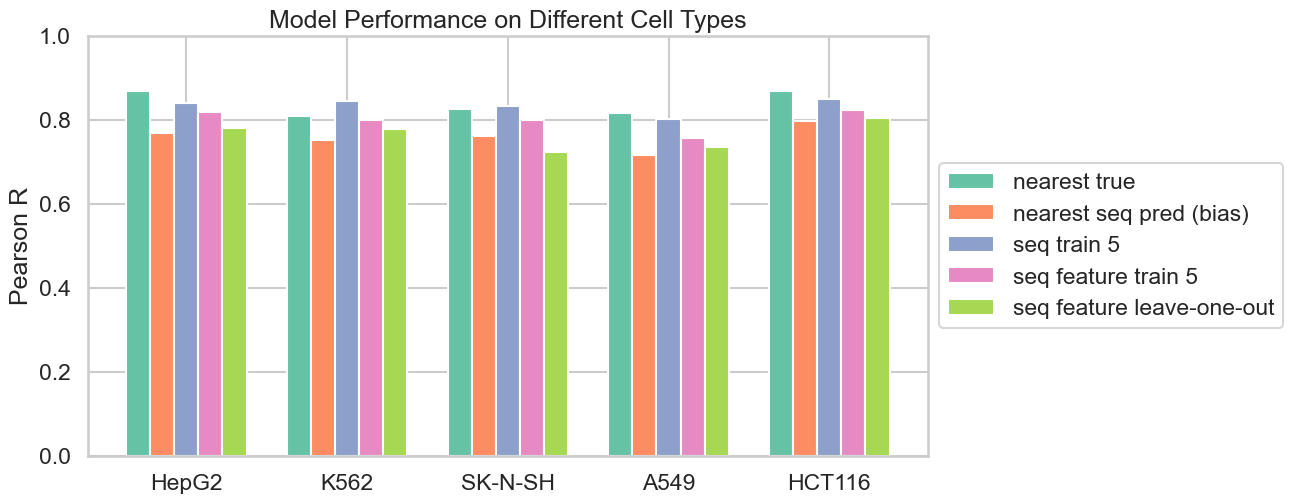

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 假设数据如下
cell_types = ["HepG2", "K562", "SK-N-SH", "A549", "HCT116"]
models = [
    "nearest true",
    "nearest seq pred (bias)",
    "seq train 5",
    "seq feature train 5",
    "seq feature leave-one-out",
]
performance = [
    [0.867, 0.808, 0.826, 0.815, 0.867],  # nearest true
    [0.769, 0.752, 0.760, 0.716, 0.797],  # nearest seq pred (bias)
    [0.839, 0.844, 0.832, 0.801, 0.848],  # seq train 5
    [0.817, 0.798, 0.800, 0.756, 0.823],  # seq feature train 5
    [0.779, 0.778, 0.724, 0.735, 0.803],  # seq feature leave-one-out
]

x = np.arange(len(cell_types))  # [0,1,2,3,4]
bar_width = 0.15

plt.figure(figsize=(12, 6), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)

for i, model in enumerate(models):
    # i 对应第几个模型，bar_left 是确定每一个模型在 x 轴上的位置
    bar_left = x + (i - 2) * bar_width  # 这里 -2 是为了居中
    plt.bar(bar_left, performance[i], width=bar_width, label=model, color=color_list[i])

plt.ylim(0,1)
plt.xticks(x, cell_types)
plt.ylabel("Pearson R")
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.title("Model Performance on Different Cell Types")
plt.show()
